In [1]:
import pandas as pd
import numpy as np

In [2]:
loan_data_inputs_2015 = pd.read_csv('loan_data_inputs_2015.csv')
loan_data_targets_2015 = pd.read_csv('loan_data_targets_2015.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20,56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data_inputs_2015, loan_data_targets_2015,
                                                                                                                  test_size=.2, random_state=42)




In [5]:
loan_data_inputs_train.shape

(336875, 321)

In [6]:
loan_data_targets_train.shape

(336875, 2)

In [7]:
loan_data_inputs_test.shape

(84219, 321)

In [8]:
loan_data_targets_test.shape

(84219, 2)

In [9]:
loan_data_targets_test.head()

,Unnamed: 0,good_bad
375979,375979,1
303172,303172,1
316388,316388,1
46926,46926,1
391889,391889,1


In [10]:
loan_data_targets_test = loan_data_targets_test.drop(['Unnamed: 0'], axis=1)

In [11]:
loan_data_targets_test.shape

(84219, 1)

In [12]:
loan_data_targets_train = loan_data_targets_train.drop(['Unnamed: 0'], axis=1)

In [13]:
loan_data_targets_train.shape

(336875, 1)

## Selecting Features

In [14]:
inputs_train_with_ref_cat = loan_data_inputs_train[['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:Rent_Other_None_Any',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [15]:
ref_categories = ['grade:G',
'home_ownership:Rent_Other_None_Any',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [16]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
308635,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
92420,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
336354,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
137359,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
231186,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [17]:
inputs_train.dtypes

grade:A                         int64
grade:B                         int64
grade:C                         int64
grade:D                         int64
grade:E                         int64
                                ...  
mths_since_last_record:3-20     int64
mths_since_last_record:21-31    int64
mths_since_last_record:32-80    int64
mths_since_last_record:81-86    int64
mths_since_last_record:>86      int64
Length: 104, dtype: object

In [18]:
loan_data_targets_train.dtypes

good_bad    int64
dtype: object

In [19]:
loan_data_targets_train = loan_data_targets_train.astype(int)

In [20]:
loan_data_targets_train.dtypes

good_bad    int64
dtype: object

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [22]:
reg = LogisticRegression()

In [23]:
pd.options.display.max_rows = None

In [24]:
inputs_train.shape

(336875, 104)

In [25]:
reg.fit(inputs_train, loan_data_targets_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
reg.intercept_

array([0.82187233])

In [27]:
reg.coef_

array([[ 0.34994709, -0.20448776,  1.10664866,  0.74489116,  0.53476824,
         0.37831174,  0.09918309,  0.24837662, -0.10974062, -0.07068125,
         0.07255401,  0.02851964,  0.06236609,  0.10906963,  0.03693935,
         0.25592012,  0.08443475,  0.1006371 ,  0.37194232,  0.28780596,
         0.68629074, -0.01659301, -0.06454709,  0.14989008,  0.0577874 ,
         0.12921434, -0.00522864,  0.41903958, -0.27438319, -0.04366996,
         0.12356758,  0.1081659 ,  0.24994184,  0.25499087,  0.51729637,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  2.93462903,  2.57222392,  0.68498822,  0.43755794,
        -0.0405466 , -0.01589146,  0.02334659,  0.04372392,  0.01396131,
         0.0978092 ,  0.00358555,  0.32984993,  0.16929223,  0.01815421,
        -0.01158329, -0.14258172, -0.06463677,  0.01512916,  0.07223603,
         0.30251901,  0.34621395, -0.15959324,  0.14468714, -0.08069572,
        -0.14693822, -0.10161371, -0.03523816,  0.0

In [28]:
feature_name = inputs_train.columns.values

In [29]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)

Here, we created a summary table that contains the feature names and their corresponding coefficients. We have to transpose the coefficients in order to change them from a row to a column.

Now we'll add one coefficient not associated with an independent variable: the intercept.

In [30]:
summary_table.index = summary_table.index + 1 #moves all rows one row down.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]] #fill the first row
summary_table = summary_table.sort_index() #sort table but index

In [31]:
summary_table

,Feature name,Coefficients
0,Intercept,0.821872
1,grade:A,0.349947
2,grade:B,-0.204488
3,grade:C,1.106649
4,grade:D,0.744891
5,grade:E,0.534768
6,grade:F,0.378312
7,home_ownership:OWN,0.099183
8,home_ownership:MORTGAGE,0.248377
9,addr_state:NM_VA,-0.109741


### Building a Log Reg Model with P-Values

We need a way to assess which independent variables contribute to predicting borrower default. We're only going to keep the relevant variables in our model. We do this by checking the statistical significance of each dummy variable.

We must obtain the mutlivariate p-values. However, this is not possible in the standard library of Logistic Regression, so we must make our own class.

In [32]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
#^here we inherit everything from the original LogReg class        
        
    def fit(self, X, y):
        self.model.fit(X, y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X)
        Cramer_Rao = np.linalg.pinv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [33]:
reg = LogisticRegression_with_p_values()

In [34]:
reg.fit(inputs_train, loan_data_targets_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


In [35]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.821872
1,grade:A,0.349947
2,grade:B,-0.204488
3,grade:C,1.106649
4,grade:D,0.744891
5,grade:E,0.534768
6,grade:F,0.378312
7,home_ownership:OWN,0.099183
8,home_ownership:MORTGAGE,0.248377
9,addr_state:NM_VA,-0.109741


Now we can add the p-values!

In [36]:
p_values = reg.p_values

What this gives us are the p-values of the coefficients of the indpt variables, but not for the intercept.

In order to match the p-values to coefficients as columns, we can add an NAN value to the first row.


In [37]:
p_values = np.append(np.nan, np.array(p_values))

In [38]:
summary_table['p_values'] = p_values

In [39]:
summary_table.p_values = summary_table.p_values.round(5)

In [40]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.821872,NaN
1,grade:A,0.349947,0.42923
2,grade:B,-0.204488,0.63606
3,grade:C,1.106649,0.00000
4,grade:D,0.744891,0.00000
5,grade:E,0.534768,0.00000
6,grade:F,0.378312,0.00004
7,home_ownership:OWN,0.099183,0.02231
8,home_ownership:MORTGAGE,0.248377,0.00000
9,addr_state:NM_VA,-0.109741,0.14054


There are 104 dummy variables in our model.

Each original independent variable is represented by several dummy variables.

If one or fewer dummy variables representing one original independent variable are statistically significant,  it would be best to retain all dummy variables that represent that original independent variable.

*Note*
If a p-values is lower than 0.05, we conclude that the coefficient of a variable is statistically significant.
So we remove those variables with a p-value greater than .05

We will remove the following variables:

addr_state, verification_status, purpose, mths_since_issue_date, mths_since_earliest_cr_line, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, acc_now, total_rev_hi_lim, annual_inc, dti, mths_since_last_record, 


In [41]:
#Only taking the variables we found to be significant.
inputs_train_with_ref_cat = loan_data_inputs_train[[
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:Rent_Other_None_Any',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'acc_now_delinq:0',
'acc_now_delinq:>=1', 
]]

In [42]:
#We only take the reference categories of the dummy variables we found significant (p less than .05)
ref_categories = ['grade:G',
'home_ownership:Rent_Other_None_Any',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
'acc_now_delinq:0']

In [43]:
#inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [44]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,acc_now_delinq:>=1
308635,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0
92420,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
336354,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
137359,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
231186,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0


This new data frame only contains the new set of dummy variables we will use in our new model.

In [45]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
feature_name = inputs_train.columns.values

In [47]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.842402
1,grade:A,0.395478
2,grade:B,-0.182744
3,grade:C,1.161787
4,grade:D,0.779951
5,grade:E,0.556763
6,grade:F,0.389199
7,home_ownership:OWN,0.100992
8,home_ownership:MORTGAGE,0.254808
9,initial_list_status:w,0.418799


In [48]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table.p_values = summary_table.p_values.round(5)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.842402,NaN
1,grade:A,0.395478,0.37780
2,grade:B,-0.182744,0.67662
3,grade:C,1.161787,0.00000
4,grade:D,0.779951,0.00000
5,grade:E,0.556763,0.00000
6,grade:F,0.389199,0.00000
7,home_ownership:OWN,0.100992,0.01680
8,home_ownership:MORTGAGE,0.254808,0.00000
9,initial_list_status:w,0.418799,0.00000


We now have the final PD model!! Let's interpret the grade coefficient.

Grade G is the reference category. We see that going from F to C, the coefficients are increasing in magnitude, ie, the odds of being good are increasing as external rate is increasing. But when we get to B, the odds of being good decreases and then rises again when we get to A.

In [159]:
import pickle

In [160]:
pickle.dump(reg2, open('pd_model_2015.sav', 'wb'))

## PD Model Validation

In [49]:
#Only taking the variables we found to be significant.
inputs_test_with_ref_cat = loan_data_inputs_test[[
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:Rent_Other_None_Any',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'acc_now_delinq:0',
'acc_now_delinq:>=1', 
]]

In [50]:
#We only take the reference categories of the dummy variables we found significant (p less than .05)
ref_categories = ['grade:G',
'home_ownership:Rent_Other_None_Any',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
'acc_now_delinq:0']

In [51]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis=1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,acc_now_delinq:>=1
375979,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
303172,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0
316388,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
46926,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
391889,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0


Now we will estimate the probability of defualt of each observation.

In [52]:
y_hat_test = reg2.model.predict(inputs_test)

In [53]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [54]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [55]:
y_hat_test_proba

array([[0.02810874, 0.97189126],
       [0.00887451, 0.99112549],
       [0.08740923, 0.91259077],
       ...,
       [0.01205862, 0.98794138],
       [0.01877125, 0.98122875],
       [0.01481239, 0.98518761]])

Here we see 2 elements. The first element is the probability of default (probability of being a bad borrower).
The second element is the probability of non-default.

The only information we need in order to represent model performance is the probability of non-default.

In [56]:
y_hat_test_proba[: ][: , 1]

array([0.97189126, 0.99112549, 0.91259077, ..., 0.98794138, 0.98122875,
       0.98518761])

In [57]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [58]:
y_hat_test_proba

array([0.97189126, 0.99112549, 0.91259077, ..., 0.98794138, 0.98122875,
       0.98518761])

In [59]:
loan_data_targets_test_temp = loan_data_targets_test

In [60]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [61]:
loan_data_targets_test_temp.head()

,good_bad
0,1
1,1
2,1
3,1
4,1


In [62]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis=1)

In [63]:
df_actual_predicted_probs.shape

(84219, 2)

In [64]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [65]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [66]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
375979,1,0.971891
303172,1,0.991125
316388,1,0.912591
46926,1,0.978655
391889,1,0.980546


How accurate is this model?

### Accuracy and Area Under the Curve

In [67]:
tr = 0.9 #cutoff threshold
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [68]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
375979,1,0.971891,1
303172,1,0.991125,1
316388,1,0.912591,1
46926,1,0.978655,1
391889,1,0.980546,1


In [69]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,26,1550
1,372,82271


In [70]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.000309,0.018404
1,0.004417,0.976870


In [71]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]

0.9771785464087677

Our accuracy is 97%! However there's a bit of an issue. Given the threshold of .9, the model seems to give a lot of false positives. This means a lot of bad applicants will be given loans, which is what we don't want.

Let's set a more conservative threshold.

In [72]:
tr = 0.95 #cutoff threshold
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,347,1229
1,4757,77886


In [73]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.004120,0.014593
1,0.056484,0.924803


In [74]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]

0.9289234020826654

Now the accuracy is a little lower. However, by looking at the confusion matrix, we see that we are reducing the total number of overall applications. This could mean we are losing business.

A big thing to keep in mind is that accuracy is not the universal measure for a PD model. It will be much more helpful for us to look at the ROC curve.

This will help us measure the rates of true positive predictions (y-axis) and the rates of false positive predictions (x-axis).

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

In [76]:
x = df_actual_predicted_probs['loan_data_targets_test'].to_numpy()
x = x.astype('int')
x

array([1, 1, 1, ..., 1, 1, 1])

In [77]:
y = df_actual_predicted_probs['y_hat_test_proba'].to_numpy()
y

array([0.97189126, 0.99112549, 0.91259077, ..., 0.98794138, 0.98122875,
       0.98518761])

In [78]:
holder = roc_curve(x, y)

In [79]:
fpr = holder[0]
tpr = holder[1]
threshold = holder[2]

In [80]:
len(holder[0])

929

In [81]:
len(fpr)

929

In [82]:
tpr

array([0.00000000e+00, 1.21002384e-05, 4.71909297e-04, 4.84009535e-04,
       5.44510727e-04, 7.13914064e-04, 7.62315018e-04, 8.47016686e-04,
       8.71217163e-04, 1.04062050e-03, 1.17372312e-03, 1.22212408e-03,
       1.24632455e-03, 1.93603814e-03, 2.04494029e-03, 2.05704052e-03,
       2.20224338e-03, 2.46844863e-03, 4.51338891e-03, 5.03369916e-03,
       5.10630059e-03, 5.42090679e-03, 5.46930775e-03, 5.60241037e-03,
       5.75971347e-03, 5.86861561e-03, 6.90923611e-03, 6.92133635e-03,
       7.34484469e-03, 7.52634827e-03, 7.76835304e-03, 7.78045327e-03,
       7.84095447e-03, 8.19186138e-03, 8.37336496e-03, 8.39756543e-03,
       8.43386615e-03, 8.53066805e-03, 8.54276829e-03, 9.15988045e-03,
       9.41398546e-03, 9.51078736e-03, 9.63178975e-03, 1.02005009e-02,
       4.06326005e-02, 4.08504048e-02, 4.08746052e-02, 4.08867055e-02,
       4.77717411e-02, 4.79048437e-02, 4.81226480e-02, 4.81347483e-02,
       4.82315502e-02, 4.82557506e-02, 4.86308580e-02, 4.86550585e-02,
      

In [83]:
threshold

array([1.99863306, 0.99863306, 0.9986237 , 0.9986132 , 0.9986098 ,
       0.99844529, 0.99841488, 0.99839522, 0.99837901, 0.99825773,
       0.99822498, 0.99820707, 0.99818725, 0.99816035, 0.9981594 ,
       0.9981518 , 0.99814179, 0.997995  , 0.99799347, 0.99797322,
       0.9979558 , 0.99792201, 0.99790933, 0.99788139, 0.99785512,
       0.99775324, 0.99773355, 0.9977064 , 0.99768925, 0.99767147,
       0.99766061, 0.99763854, 0.99763701, 0.99762773, 0.9976038 ,
       0.99759239, 0.99757733, 0.99754013, 0.99752998, 0.99746035,
       0.99741265, 0.99738655, 0.99735769, 0.99732057, 0.99731852,
       0.99731712, 0.99730606, 0.99730423, 0.99729148, 0.99728535,
       0.99726821, 0.99723883, 0.99720616, 0.99717799, 0.99707772,
       0.99705782, 0.99703931, 0.99702063, 0.99699773, 0.99697144,
       0.9969553 , 0.99695298, 0.99692226, 0.99691529, 0.99691229,
       0.99689583, 0.99687405, 0.99687242, 0.99684459, 0.99684254,
       0.9968285 , 0.99678296, 0.99674313, 0.99674143, 0.99672

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

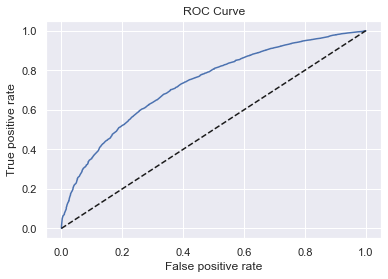

In [85]:
plt.plot(fpr, tpr) #ROC curve
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
_=plt.title('ROC Curve')

Let's calculate the area under the curve.

In [86]:
AUROC = roc_auc_score(x, y)
AUROC

0.7320399985356868

We see the area under the curve is about 73%. This model is borderline good (the cuttoff being 70%).

### Gini and Kolmogorov-Smirnov

In [87]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [88]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
279102,1,0.815448,0
412002,1,0.817091,0
257382,1,0.817091,0
183284,1,0.817091,0
253655,1,0.817091,0


In [89]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
21364,1,0.998624,1
20782,1,0.998624,1
13547,1,0.998624,1
2249,1,0.998624,1
159981,1,0.998633,1


Now, in order to calculate cumulative proportions, we need to re-index the dataframe.

In [90]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [91]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,279102,1,0.815448,0
1,412002,1,0.817091,0
2,257382,1,0.817091,0
3,183284,1,0.817091,0
4,253655,1,0.817091,0


We will need the following information:

1) The cumulative % of total population

2) The cumulative % of good borrowers

3) The cumulative % of bad borrowers


In [92]:
df_actual_predicted_probs['loan_data_targets_test'] = df_actual_predicted_probs['loan_data_targets_test'].astype('int')

This column was previously being treated as a column of objects. It needs to be a column of ints in order to run the next code cell.

In [93]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
    

In [94]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,279102,1,0.815448,0,1,1,0
1,412002,1,0.817091,0,2,2,0
2,257382,1,0.817091,0,3,3,0
3,183284,1,0.817091,0,4,4,0
4,253655,1,0.817091,0,5,5,0


In [95]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())


Now we have everything to calculate Gini and Kolmogorov-Smirnov


In [96]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,279102,1,0.815448,0,1,1,0,0.000012,0.000012,0.0
1,412002,1,0.817091,0,2,2,0,0.000024,0.000024,0.0
2,257382,1,0.817091,0,3,3,0,0.000036,0.000036,0.0
3,183284,1,0.817091,0,4,4,0,0.000047,0.000048,0.0
4,253655,1,0.817091,0,5,5,0,0.000059,0.000061,0.0


In [97]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
84214,21364,1,0.998624,1,84215,82639,1576,0.999953,0.999952,1.0
84215,20782,1,0.998624,1,84216,82640,1576,0.999964,0.999964,1.0
84216,13547,1,0.998624,1,84217,82641,1576,0.999976,0.999976,1.0
84217,2249,1,0.998624,1,84218,82642,1576,0.999988,0.999988,1.0
84218,159981,1,0.998633,1,84219,82643,1576,1.000000,1.000000,1.0


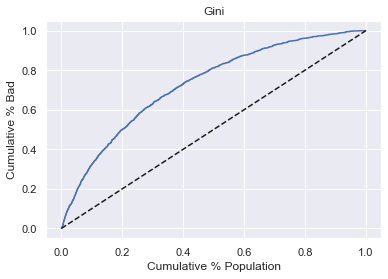

In [98]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
_=plt.title('Gini')

*Note:*

Gini = AUROC * 2 - 1

AUROC = (Gini + 1) / 2


In [99]:
Gini = AUROC*2 - 1
Gini

0.4640799970713736

For Kolmogorov-Smirnov, we are interested in the cumulative distribution functions of actual good borrowers and actual bad borrowers, plotted by the estimated probability of being a good borrower.

If our model was perfect, these two functions would be as far apart as possible, making K-S=1. In the other extreme case, K-S=0, meaning our model is predicting by chance.

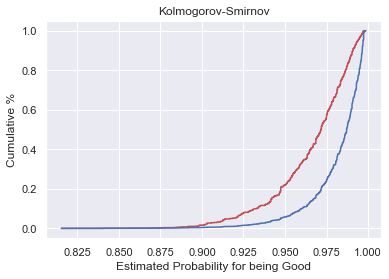

In [100]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
_=plt.title('Kolmogorov-Smirnov')


The Kolmogorov-Smirnov criterion is the maximam distance between the red and blue curves. Let's try to calculate it.


In [101]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.3430061712444161

We get around 34%. It's not close to 1, however it is significantly greater than zero.

Thus, we can say that the two distribution functions are sufficiently far away from each other and the model has satisfactory predictive power.


### Applying the PD Model

#### Calculating PD of Individual Accounts

In [102]:
pd.options.display.max_columns = None

In [103]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:Rent_Other_None_Any,home_ownership:OWN,home_ownership:MORTGAGE,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,acc_now_delinq:0,acc_now_delinq:>=1
375979,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
303172,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
316388,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0
46926,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
391889,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [104]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.842402,NaN
1,grade:A,0.395478,0.37780
2,grade:B,-0.182744,0.67662
3,grade:C,1.161787,0.00000
4,grade:D,0.779951,0.00000
5,grade:E,0.556763,0.00000
6,grade:F,0.389199,0.00000
7,home_ownership:OWN,0.100992,0.01680
8,home_ownership:MORTGAGE,0.254808,0.00000
9,initial_list_status:w,0.418799,0.00000


In [105]:
y_hat_test_proba

array([0.97189126, 0.99112549, 0.91259077, ..., 0.98794138, 0.98122875,
       0.98518761])

This tells that the probability that the first person will not defualt is 97.1%, and so on.

Let's try to make all this information more interpretable by making score cards.

### Creating a Scorecard

In [106]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:Rent_Other_None_Any,0,NaN
2,initial_list_status:f,0,NaN
3,term:60,0,NaN
4,emp_length:0,0,NaN
5,int_rate:>20.281,0,NaN
6,acc_now_delinq:0,0,NaN


Now this dataframe is in the same format as the summary_table dataframe

In [107]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,1.842402,NaN
1,1,grade:A,0.395478,0.37780
2,2,grade:B,-0.182744,0.67662
3,3,grade:C,1.161787,0.00000
4,4,grade:D,0.779951,0.00000
5,5,grade:E,0.556763,0.00000
6,6,grade:F,0.389199,0.00000
7,7,home_ownership:OWN,0.100992,0.01680
8,8,home_ownership:MORTGAGE,0.254808,0.00000
9,9,initial_list_status:w,0.418799,0.00000


This way, we'll get the output from our PD model as if we had included the reference categories in the model estimation and had coefficients of zero.

Let's make sure we have the name of the original independent variables as well.

In [108]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
#^We put zero in brackets to sepcify: we need the first thing returned by this expression

In [109]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,1.842402,NaN,Intercept
1,1,grade:A,0.395478,0.37780,grade
2,2,grade:B,-0.182744,0.67662,grade
3,3,grade:C,1.161787,0.00000,grade
4,4,grade:D,0.779951,0.00000,grade
5,5,grade:E,0.556763,0.00000,grade
6,6,grade:F,0.389199,0.00000,grade
7,7,home_ownership:OWN,0.100992,0.01680,home_ownership
8,8,home_ownership:MORTGAGE,0.254808,0.00000,home_ownership
9,9,initial_list_status:w,0.418799,0.00000,initial_list_status


In order to create a scorecard, we need to turn the regression coefficients from our PD Model into simple scores.

Let the min score = 300 and the max score = 850

We also need the min and max credit worthiness assessment that can be obtained from the PD model.

The min credit assessment is reached when a borrower falls into the 'worst' categories for all variables, and vice versa for the max credit.

In [110]:
min_score = 300
max_score = 850

In [111]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept              1.842402
acc_now_delinq        -0.470682
emp_length            -0.055006
grade                 -0.182744
home_ownership         0.000000
initial_list_status    0.000000
int_rate               0.000000
term                  -0.290636
Name: Coefficients, dtype: float64

In [112]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

0.8433329527740197

In [113]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept              1.842402
acc_now_delinq         0.000000
emp_length             0.236153
grade                  1.161787
home_ownership         0.254808
initial_list_status    0.418799
int_rate               3.061699
term                   0.000000
Name: Coefficients, dtype: float64

In [114]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

6.975646658507948

How do we rescale the coefficients to scores?

We have to multiply each coefficient to the ratio of the (difference between the max desired score and the min desired score) and (max sum of coefficients and min sum of coefficients)


In [115]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,1.842402,NaN,Intercept,165.242837
1,1,grade:A,0.395478,0.37780,grade,35.469970
2,2,grade:B,-0.182744,0.67662,grade,-16.390097
3,3,grade:C,1.161787,0.00000,grade,104.199275
4,4,grade:D,0.779951,0.00000,grade,69.952892
5,5,grade:E,0.556763,0.00000,grade,49.935409
6,6,grade:F,0.389199,0.00000,grade,34.906838
7,7,home_ownership:OWN,0.100992,0.01680,home_ownership,9.057816
8,8,home_ownership:MORTGAGE,0.254808,0.00000,home_ownership,22.853433
9,9,initial_list_status:w,0.418799,0.00000,initial_list_status,37.561595


Everything looks good, except for the very low value for the Score-Calculation for the intercept. This is because the intercept is not a dummy variable. It's a coefficient, which is always apart of the calculation of credit worthiness assessment.

The score corresponding to the intercept is very close to the minimum score in the worst case scenario.


In [116]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,1.842402,NaN,Intercept,389.605297
1,1,grade:A,0.395478,0.37780,grade,35.469970
2,2,grade:B,-0.182744,0.67662,grade,-16.390097
3,3,grade:C,1.161787,0.00000,grade,104.199275
4,4,grade:D,0.779951,0.00000,grade,69.952892
5,5,grade:E,0.556763,0.00000,grade,49.935409
6,6,grade:F,0.389199,0.00000,grade,34.906838
7,7,home_ownership:OWN,0.100992,0.01680,home_ownership,9.057816
8,8,home_ownership:MORTGAGE,0.254808,0.00000,home_ownership,22.853433
9,9,initial_list_status:w,0.418799,0.00000,initial_list_status,37.561595


Now we see it at around 389, which is much closer to our min_score value of 300.


In [117]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,1.842402,NaN,Intercept,389.605297,390.0
1,1,grade:A,0.395478,0.37780,grade,35.469970,35.0
2,2,grade:B,-0.182744,0.67662,grade,-16.390097,-16.0
3,3,grade:C,1.161787,0.00000,grade,104.199275,104.0
4,4,grade:D,0.779951,0.00000,grade,69.952892,70.0
5,5,grade:E,0.556763,0.00000,grade,49.935409,50.0
6,6,grade:F,0.389199,0.00000,grade,34.906838,35.0
7,7,home_ownership:OWN,0.100992,0.01680,home_ownership,9.057816,9.0
8,8,home_ownership:MORTGAGE,0.254808,0.00000,home_ownership,22.853433,23.0
9,9,initial_list_status:w,0.418799,0.00000,initial_list_status,37.561595,38.0


Let's check if the min and max possible scores are equal to the desired min and max scores.

In [118]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

301.0

In [119]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

851.0

Notice we got 851 instead 850. This is due to the rounding. We can fix this. It would be best to subtract one to the variable that was rounded up the most.

In [120]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,1.842402,NaN,Intercept,389.605297,390.0,0.394703
1,1,grade:A,0.395478,0.37780,grade,35.469970,35.0,-0.469970
2,2,grade:B,-0.182744,0.67662,grade,-16.390097,-16.0,0.390097
3,3,grade:C,1.161787,0.00000,grade,104.199275,104.0,-0.199275
4,4,grade:D,0.779951,0.00000,grade,69.952892,70.0,0.047108
5,5,grade:E,0.556763,0.00000,grade,49.935409,50.0,0.064591
6,6,grade:F,0.389199,0.00000,grade,34.906838,35.0,0.093162
7,7,home_ownership:OWN,0.100992,0.01680,home_ownership,9.057816,9.0,-0.057816
8,8,home_ownership:MORTGAGE,0.254808,0.00000,home_ownership,22.853433,23.0,0.146567
9,9,initial_list_status:w,0.418799,0.00000,initial_list_status,37.561595,38.0,0.438405


In [121]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][9] = 37
df_scorecard

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,1.842402,NaN,Intercept,389.605297,390.0,0.394703,390.0
1,1,grade:A,0.395478,0.37780,grade,35.469970,35.0,-0.469970,35.0
2,2,grade:B,-0.182744,0.67662,grade,-16.390097,-16.0,0.390097,-16.0
3,3,grade:C,1.161787,0.00000,grade,104.199275,104.0,-0.199275,104.0
4,4,grade:D,0.779951,0.00000,grade,69.952892,70.0,0.047108,70.0
5,5,grade:E,0.556763,0.00000,grade,49.935409,50.0,0.064591,50.0
6,6,grade:F,0.389199,0.00000,grade,34.906838,35.0,0.093162,35.0
7,7,home_ownership:OWN,0.100992,0.01680,home_ownership,9.057816,9.0,-0.057816,9.0
8,8,home_ownership:MORTGAGE,0.254808,0.00000,home_ownership,22.853433,23.0,0.146567,23.0
9,9,initial_list_status:w,0.418799,0.00000,initial_list_status,37.561595,38.0,0.438405,37.0


In [122]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

In [123]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

301.0

### Calculating Credit Score

We have to sum the credit scores corresponding to the respective dummy variables categories.

In [124]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:Rent_Other_None_Any,home_ownership:OWN,home_ownership:MORTGAGE,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,acc_now_delinq:0,acc_now_delinq:>=1
375979,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
303172,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
316388,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0
46926,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
391889,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [125]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,1.842402,NaN,Intercept,389.605297,390.0,0.394703,390.0
1,1,grade:A,0.395478,0.37780,grade,35.469970,35.0,-0.469970,35.0
2,2,grade:B,-0.182744,0.67662,grade,-16.390097,-16.0,0.390097,-16.0
3,3,grade:C,1.161787,0.00000,grade,104.199275,104.0,-0.199275,104.0
4,4,grade:D,0.779951,0.00000,grade,69.952892,70.0,0.047108,70.0
5,5,grade:E,0.556763,0.00000,grade,49.935409,50.0,0.064591,50.0
6,6,grade:F,0.389199,0.00000,grade,34.906838,35.0,0.093162,35.0
7,7,home_ownership:OWN,0.100992,0.01680,home_ownership,9.057816,9.0,-0.057816,9.0
8,8,home_ownership:MORTGAGE,0.254808,0.00000,home_ownership,22.853433,23.0,0.146567,23.0
9,9,initial_list_status:w,0.418799,0.00000,initial_list_status,37.561595,38.0,0.438405,37.0


In [ ]:
#df_scorecard.to_csv('df_scorecard.csv')

Now let's calculate the scores from the test data set. We do this by multiplying the values of the dummy variables, which are only 1's and 0's, by the respective score. But before we do this we have to make sure they are ordered the same way.

In [126]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [127]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [128]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:Rent_Other_None_Any,home_ownership:OWN,home_ownership:MORTGAGE,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,acc_now_delinq:0,acc_now_delinq:>=1
375979,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
303172,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
316388,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0
46926,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
391889,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [129]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [130]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,acc_now_delinq:>=1,grade:G,home_ownership:Rent_Other_None_Any,initial_list_status:f,term:60,emp_length:0,int_rate:>20.281,acc_now_delinq:0
375979,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1
303172,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
316388,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1
46926,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
391889,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1


In [131]:
scorecard_scores = df_scorecard['Score - Final']

In [132]:
inputs_test_with_ref_cat_w_intercept.shape

(84219, 28)

In [133]:
scorecard_scores.shape

(28,)

In [134]:
scorecard_scores = scorecard_scores.values.reshape(28, 1)

In [135]:
scorecard_scores.shape

(28, 1)

In [136]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [137]:
y_scores.head()

,0
375979,542.0
303172,648.0
316388,435.0
46926,567.0
391889,576.0


The y_scores now contains all the scores for all observations from the test data set.

### From Credit Score to PD

In [138]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [139]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
375979,0.971847
303172,0.991193
316388,0.912818
46926,0.978549
391889,0.980557


y_score now displays the probability of defualt for each entry.

Now let's compare the probabilities of non-defualt obtained from the credit score.


In [140]:
y_hat_test_proba[0: 5]

array([0.97189126, 0.99112549, 0.91259077, 0.97865496, 0.98054565])

We see that the values are similar from the dataframe and the array. But why aren't they equal?

This is because when we determined the scores each dummy category would contribute to the overall score, we rounded them!


### Setting Cut-Offs

In [141]:
threshold

array([1.99863306, 0.99863306, 0.9986237 , 0.9986132 , 0.9986098 ,
       0.99844529, 0.99841488, 0.99839522, 0.99837901, 0.99825773,
       0.99822498, 0.99820707, 0.99818725, 0.99816035, 0.9981594 ,
       0.9981518 , 0.99814179, 0.997995  , 0.99799347, 0.99797322,
       0.9979558 , 0.99792201, 0.99790933, 0.99788139, 0.99785512,
       0.99775324, 0.99773355, 0.9977064 , 0.99768925, 0.99767147,
       0.99766061, 0.99763854, 0.99763701, 0.99762773, 0.9976038 ,
       0.99759239, 0.99757733, 0.99754013, 0.99752998, 0.99746035,
       0.99741265, 0.99738655, 0.99735769, 0.99732057, 0.99731852,
       0.99731712, 0.99730606, 0.99730423, 0.99729148, 0.99728535,
       0.99726821, 0.99723883, 0.99720616, 0.99717799, 0.99707772,
       0.99705782, 0.99703931, 0.99702063, 0.99699773, 0.99697144,
       0.9969553 , 0.99695298, 0.99692226, 0.99691529, 0.99691229,
       0.99689583, 0.99687405, 0.99687242, 0.99684459, 0.99684254,
       0.9968285 , 0.99678296, 0.99674313, 0.99674143, 0.99672

In [142]:
fpr.shape

(929,)

In [143]:
tpr.shape

(929,)

In [144]:
threshold.shape

(929,)

In [145]:
df_cutoffs = pd.concat([pd.DataFrame(threshold), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis=1)

In [146]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [147]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.998633,0.0,0.000000
1,0.998633,0.0,0.000012
2,0.998624,0.0,0.000472
3,0.998613,0.0,0.000484
4,0.998610,0.0,0.000545


The thresholds are in descending order. The first row is not very instructive. We'll set the threshold to a probability which is close to 1.

In [148]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10,16)

In [149]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1-df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()


In [150]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,3519.0
1,0.998633,0.0,0.000012,816.0
2,0.998624,0.0,0.000472,815.0
3,0.998613,0.0,0.000484,814.0
4,0.998610,0.0,0.000545,814.0


Notice the first score is very high and out of range. Let's place the max score on the first row.


In [151]:
df_cutoffs['Score'][0] = max_score

In [152]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,850.0
1,0.998633,0.0,0.000012,816.0
2,0.998624,0.0,0.000472,815.0
3,0.998613,0.0,0.000484,814.0
4,0.998610,0.0,0.000545,814.0


In [153]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
924,0.854065,0.999365,0.999722,383.0
925,0.841022,1.000000,0.999831,374.0
926,0.839263,1.000000,0.999867,373.0
927,0.817091,1.000000,0.999988,359.0
928,0.815448,1.000000,1.000000,358.0


Now let's see the approval and rejection rates for each possible cutoff. We'll create a function that calculates the number of approved borrowers for the given threshold.

This function will return the number of borrowers for which the predicted probability is >= p.


In [154]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [155]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [156]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.0,0.000000,850.0,0,84219,0.000000,1.000000
1,0.998633,0.0,0.000012,816.0,1,84218,0.000012,0.999988
2,0.998624,0.0,0.000472,815.0,39,84180,0.000463,0.999537
3,0.998613,0.0,0.000484,814.0,40,84179,0.000475,0.999525
4,0.998610,0.0,0.000545,814.0,45,84174,0.000534,0.999466


In [157]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
924,0.854065,0.999365,0.999722,383.0,84195,24,0.999715,0.000285
925,0.841022,1.000000,0.999831,374.0,84205,14,0.999834,0.000166
926,0.839263,1.000000,0.999867,373.0,84208,11,0.999869,0.000131
927,0.817091,1.000000,0.999988,359.0,84218,1,0.999988,0.000012
928,0.815448,1.000000,1.000000,358.0,84219,0,1.000000,0.000000
